In [3]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Set the path to the dataset
dataset_path = 'C:\\Users\\bobba\\Downloads\\archive(10)\\Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [18]:
df.head()

,image,label
0,C:\Users\bobba\Downloads\archive(10)\Rice_Imag...,Arborio
1,C:\Users\bobba\Downloads\archive(10)\Rice_Imag...,Arborio
2,C:\Users\bobba\Downloads\archive(10)\Rice_Imag...,Arborio
3,C:\Users\bobba\Downloads\archive(10)\Rice_Imag...,Arborio
4,C:\Users\bobba\Downloads\archive(10)\Rice_Imag...,Arborio


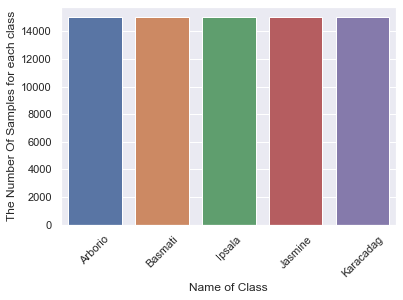

In [19]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

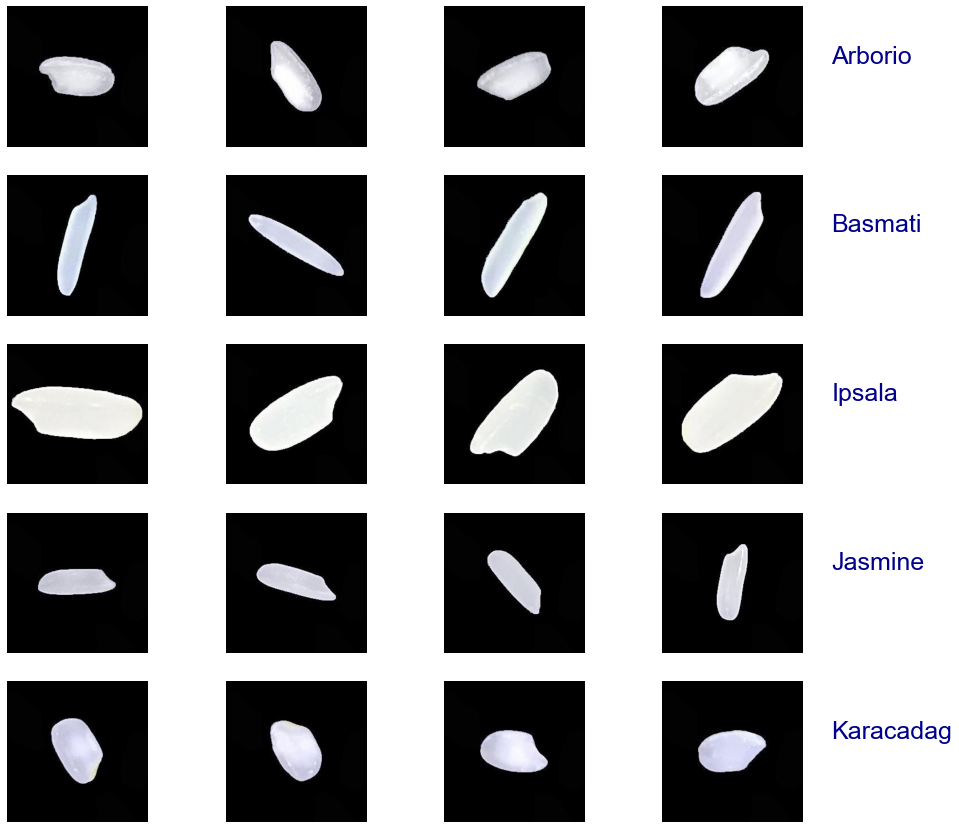

In [11]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [12]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Split the training data further into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Create data frames for the training, testing, and validation data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_validation = pd.DataFrame({'image': X_val, 'label': y_val})

In [13]:
from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
# Create a generator for the validation data
validation_generator = datagen.flow_from_dataframe(
    df_validation,  # Use your DataFrame for validation data
    x_col='image',  # Assuming 'image' is the column containing image file paths
    y_col='label',  # Assuming 'label' is the column containing class labels
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False to maintain the order
)

Found 42000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.
Found 18000 validated image filenames belonging to 5 classes.


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [28]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Train the model on the training data
history = model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
1313/1313 [==============================] - 1866s 1s/step - loss: 0.4046 - accuracy: 0.8389 - val_loss: 0.3607 - val_accuracy: 0.8718
Epoch 2/10
1313/1313 [==============================] - 1328s 1s/step - loss: 0.1782 - accuracy: 0.9345 - val_loss: 0.1674 - val_accuracy: 0.9334
Epoch 3/10
1313/1313 [==============================] - 1824s 1s/step - loss: 0.1280 - accuracy: 0.9540 - val_loss: 0.1677 - val_accuracy: 0.9405
Epoch 4/10
1313/1313 [==============================] - 879s 670ms/step - loss: 0.1143 - accuracy: 0.9580 - val_loss: 0.1117 - val_accuracy: 0.9588
Epoch 5/10
1313/1313 [==============================] - 168s 128ms/step - loss: 0.1042 - accuracy: 0.9623 - val_loss: 0.1577 - val_accuracy: 0.9445
Epoch 6/10
1313/1313 [==============================] - 281s 214ms/step - loss: 0.0853 - accuracy: 0.9695 - val_loss: 0.0635 - val_accuracy: 0.9767
Epoch 7/10
1313/1313 [==============================] - 166s 126ms/step - loss: 0.0791 - accuracy: 0.9723 - val_loss: 

Text(0.5, 1.0, 'Accuracy comparison between Validation and Train Data set')

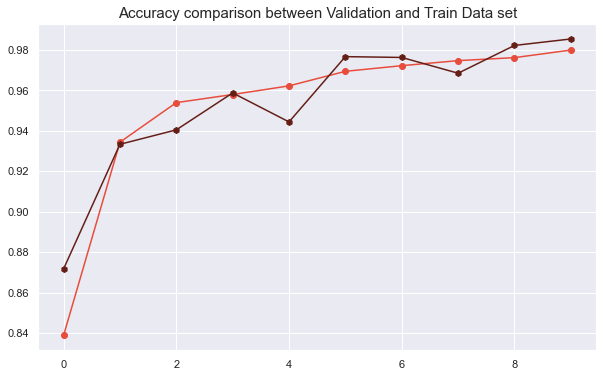

In [32]:
# Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()

# Add layers with different activations
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))  # Change activation to sigmoid
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='tanh'))  # Change activation to tanh
model.add(Dense(5, activation='softmax'))

# Compile the model with a different optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])  # Change optimizer to SGD

# Train the model on the training data
history = model.fit_generator(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
1313/1313 [==============================] - 1669s 1s/step - loss: 1.4792 - accuracy: 0.2969 - val_loss: 1.1650 - val_accuracy: 0.4348
Epoch 2/10
1313/1313 [==============================] - 169s 128ms/step - loss: 1.1231 - accuracy: 0.5034 - val_loss: 1.0255 - val_accuracy: 0.5701
Epoch 3/10
1313/1313 [==============================] - 162s 123ms/step - loss: 0.9607 - accuracy: 0.6049 - val_loss: 0.9399 - val_accuracy: 0.6008
Epoch 4/10
1313/1313 [==============================] - 161s 123ms/step - loss: 0.8150 - accuracy: 0.6663 - val_loss: 0.7374 - val_accuracy: 0.7052
Epoch 5/10
1313/1313 [==============================] - 163s 124ms/step - loss: 0.7307 - accuracy: 0.6977 - val_loss: 0.6704 - val_accuracy: 0.7219
Epoch 6/10
1313/1313 [==============================] - 522s 398ms/step - loss: 0.6695 - accuracy: 0.7194 - val_loss: 0.6171 - val_accuracy: 0.7450
Epoch 7/10
1313/1313 [==============================] - 1070s 815ms/step - loss: 0.6280 - accuracy: 0.7359 - val_l

Text(0.5, 1.0, 'Accuracy comparison between Validation and Train Data set')

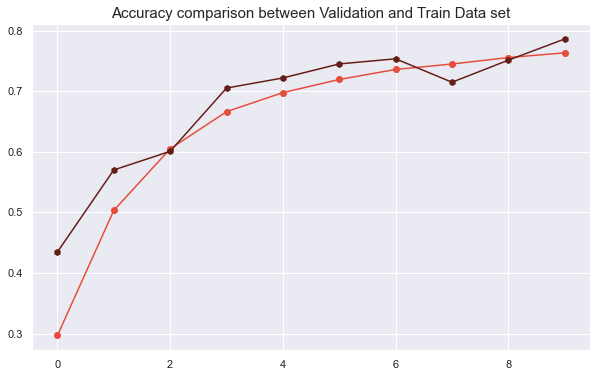

In [15]:
# Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
